In [4]:
import pandas as pd

In [5]:
dataFrame = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [6]:
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [7]:
import seaborn as sbn
import matplotlib.pyplot as plt 

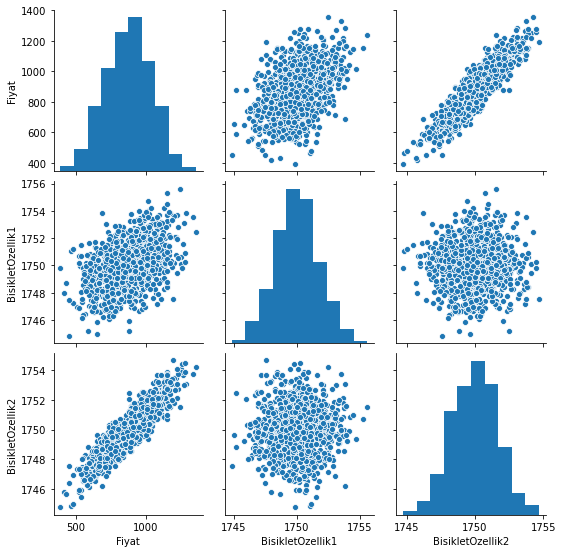

In [8]:
sbn.pairplot(dataFrame)

## -Veriyi test/train olarak ikiye ayırmak

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# train test split

In [11]:
# y = ax + b
# y = label diyoruz
y = dataFrame["Fiyat"].values # values = numpy dizisine çevirmemizi sağlıyor

# x = feature
X = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values # values demezsek pandas series olur, values dersek numpy dizisi oldu

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 15)

In [12]:
X_train.shape  

(670, 2)

In [13]:
X_test.shape

(330, 2)

In [14]:
y_train.shape

(670,)

In [15]:
y_test.shape

(330,)

## Veriyi normalize etme / Scale etme

In [16]:
# Features'ı yani x i scale edicez sadece

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler() # instance oluşturduk

In [19]:
scaler.fit(X_train)

MinMaxScaler()

In [20]:
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)
# verilerin hepsi scale edildi 0-1 aralığına getirildi.

In [21]:
X_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [22]:
import tensorflow as tsf
 # keras artık tenserflow içinde geliyor.
from tensorflow.keras.models import Sequential # modeli oluşturuyoruz.
from tensorflow.keras.layers import Dense # model içindeki katmanları koyuyoruz.

In [23]:
model = Sequential()

model.add(Dense(5,activation = "relu")) # Dense = kaç nöron ve activation olacak / kaç tane hidden layer olsun istiyosan o kadar aşağıya ekle
model.add(Dense(5,activation = "relu"))
model.add(Dense(5,activation = "relu"))

model.add(Dense(1)) # çıktı/output katmanı 1 tane ekledik.

model.compile(optimizer = "rmsprop", loss = "mse") # adam veya rmsprop deniyoruz = maaliyet fonk
# mse regression = mean squared error / uzaklıkların üssü alınmış halinin ortalaması 
# batch = modele veriyi kaçar kaçar vericeğimizi ayarlayabiliyoruz 
# epoch = bütün bir veri setinin içinden bir kere geçildiğinde bir epoch oluyor. çok fazla geçilmemeli overfitting olur.

In [24]:
model.fit(X_train,y_train,epochs = 250)

Epoch 1/250
21/21 [==============================] - 3s 2ms/step - loss: 799325.3750
Epoch 2/250
21/21 [==============================] - 0s 1ms/step - loss: 798559.0824
Epoch 3/250
21/21 [==============================] - 0s 1ms/step - loss: 799757.9545
Epoch 4/250
21/21 [==============================] - 0s 2ms/step - loss: 799394.4205
Epoch 5/250
21/21 [==============================] - 0s 1ms/step - loss: 800870.7727
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 808427.4261
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 789883.9631
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 783384.9688
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 796811.2159
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 788854.9886
Epoch 11/250
21/21 [==============================] - ETA: 0s - loss: 775092.12 - 0s 1ms/step - loss: 789852.2699
Epoch 12/250
21/21 [===============

21/21 [==============================] - 0s 2ms/step - loss: 386510.3821
Epoch 97/250
21/21 [==============================] - 0s 1ms/step - loss: 375312.8878
Epoch 98/250
21/21 [==============================] - 0s 1ms/step - loss: 370622.4616
Epoch 99/250
21/21 [==============================] - 0s 1ms/step - loss: 354597.5611
Epoch 100/250
21/21 [==============================] - 0s 2ms/step - loss: 342271.8139
Epoch 101/250
21/21 [==============================] - 0s 2ms/step - loss: 322618.0469
Epoch 102/250
21/21 [==============================] - 0s 2ms/step - loss: 316101.3352
Epoch 103/250
21/21 [==============================] - 0s 2ms/step - loss: 299538.8849
Epoch 104/250
21/21 [==============================] - 0s 2ms/step - loss: 281989.3565
Epoch 105/250
21/21 [==============================] - 0s 1ms/step - loss: 273354.6925
Epoch 106/250
21/21 [==============================] - 0s 1ms/step - loss: 255455.6811
Epoch 107/250
21/21 [==============================] - 0s 2m

In [25]:
loss = model.history.history["loss"] # type'ı dictti, [] array yaptık.

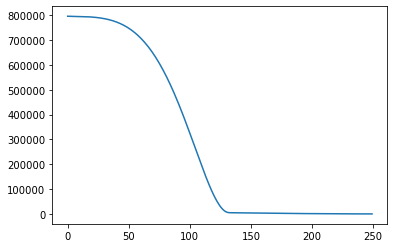

In [26]:
sbn.lineplot(x = range(len(loss)),y = loss)

In [27]:
trainLoss= model.evaluate(X_train,y_train, verbose = 0)

In [28]:
testLoss = model.evaluate(X_test,y_test, verbose = 0)

In [29]:
trainLoss

145.6536865234375

In [30]:
testLoss

136.0190887451172

In [31]:
test_tahminleri = model.predict(X_test) # x testi verdikki bize y testi çıkarsın

In [32]:
# test_tahminleri

In [33]:
tahminDF = pd.DataFrame(y_test, columns = ["Gercek Y"])

In [34]:
tahminDF

,Gercek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [35]:
# test tahminleri dizi olarak gözüküyor bunu series'e çevirelimki dataframe'in içine koyabileyim.
test_tahminleri = pd.Series(test_tahminleri.reshape(330,))

In [36]:
test_tahminleri

0      1071.054443
1       637.707092
2       878.185608
3       898.285217
4       903.769043
          ...     
325    1009.262756
326     799.068726
327     772.794922
328    1155.947998
329     811.319824
Length: 330, dtype: float32

In [37]:
# pandas da gördüğümüz concat işlemiyle birleştiricez.

In [38]:
tahminDF = pd.concat([tahminDF,test_tahminleri],axis = 1)

In [39]:
tahminDF

,Gercek Y,0
0,1081.652164,1071.054443
1,622.675990,637.707092
2,889.356810,878.185608
3,902.826733,898.285217
4,897.662404,903.769043
...,...,...
325,1028.438035,1009.262756
326,789.934950,799.068726
327,758.490486,772.794922
328,1172.871659,1155.947998


In [40]:
tahminDF.columns = ["Gercek Y","Tahmin Y"]

In [41]:
tahminDF

,Gercek Y,Tahmin Y
0,1081.652164,1071.054443
1,622.675990,637.707092
2,889.356810,878.185608
3,902.826733,898.285217
4,897.662404,903.769043
...,...,...
325,1028.438035,1009.262756
326,789.934950,799.068726
327,758.490486,772.794922
328,1172.871659,1155.947998


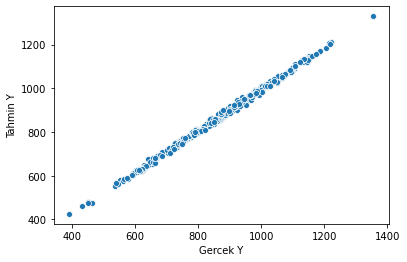

In [42]:
sbn.scatterplot(x= "Gercek Y", y = "Tahmin Y", data = tahminDF)

In [43]:
# hataların üssü alınmış hallerinin ortalamasını aldık ama hataların bir de gerçek değerini alabiliriz
# ve gerçek hata ne kadar çıkıyor onu görebiliriz bu da ortalama için fikir verir.

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
mean_absolute_error(tahminDF["Gercek Y"], tahminDF["Tahmin Y"]) 

9.388742330978928

In [46]:
mean_squared_error(tahminDF["Gercek Y"], tahminDF["Tahmin Y"])

136.01907493274624

In [47]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


In [51]:
yeniBisikletOzellikleri = [[1760,1758]]

In [52]:
yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [53]:
model.predict(yeniBisikletOzellikleri)

array([[1929.1208]], dtype=float32)

In [54]:
from tensorflow.keras.models import load_model

In [55]:
# model.save("Bisiklet_Modeli.h5") kayıt etmek için

In [56]:
# sonradanCagirilianModel.predict(yeniBisikletOzellikleri) dedğimizde kayıt ettiğimiz modeli çağırabiliriz